Best Parameters: {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 102}
Train Accuracy: 0.9809523809523809
Test Accuracy: 1.0


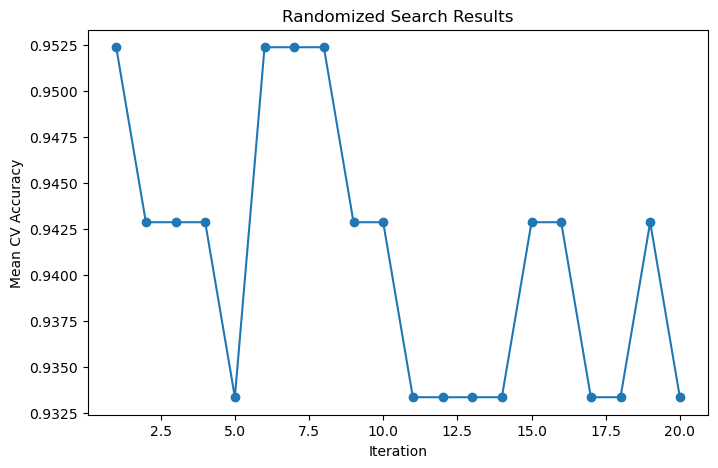

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_dist = {
 'n_estimators': randint(10, 200),
 'max_depth': randint(1, 10),
 'min_samples_split': randint(2, 10)
}
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
param_distributions=param_dist,n_iter=20, cv=3, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", random_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
results = random_search.cv_results_
scores = results['mean_test_score']
plt.figure(figsize=(8,5))
plt.plot(range(1, len(scores)+1), scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean CV Accuracy')
plt.title('Randomized Search Results')
plt.show()